In [ ]:
import numpy as np
import pandas as pd
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
import xgboost as xgb
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
#from pycaret.regression import setup, compare_models
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
#from helper_functions import prepare_data, replace_strings
from pprint import pprint

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycaret pandas shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imbalanced-learn==0.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from pycaret.classification import *

In [ ]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [ ]:
df.isna().sum() # checking missing values for train dataset

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

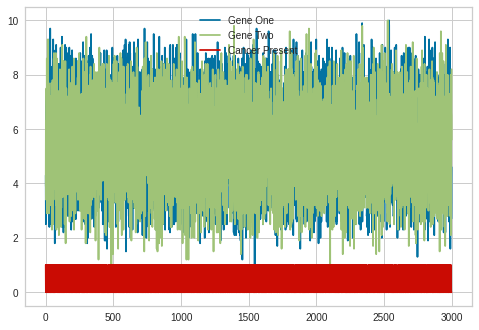

In [ ]:
df.plot()
plt.show()

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [ ]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

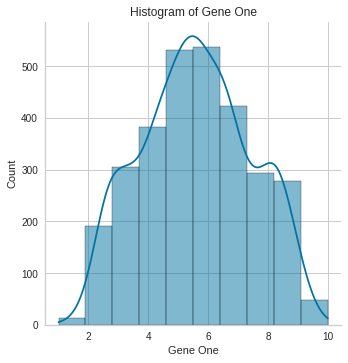

In [ ]:
sns.displot(df["Gene One"], bins=10, kde=True)
plt.title("Histogram of Gene One")
plt.show()

In [ ]:
np.round(df["Gene One"].skew()) # The skewness is zero, hence this column follows a normal distribution

0.0

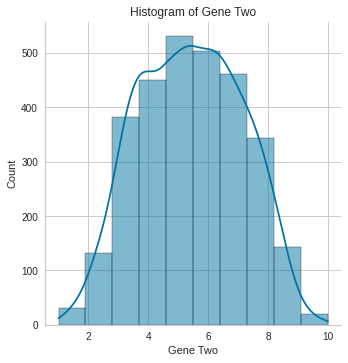

In [ ]:
sns.displot(df["Gene Two"], bins=10, kde=True)
plt.title("Histogram of Gene Two")
plt.show()

In [ ]:
np.round(df["Gene Two"].skew()) # It follows normal distribution

0.0

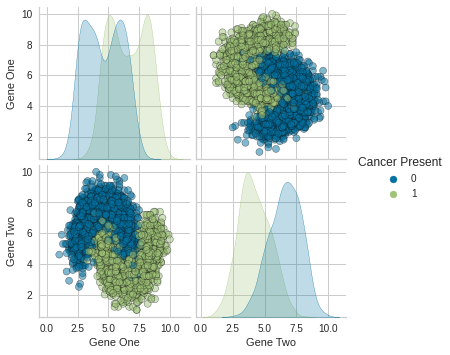

In [ ]:
# pairplot with hue Cancer_Present
sns.pairplot(df,diag_kind="kde", hue ='Cancer Present',plot_kws={'alpha':0.5, 'edgecolor': 'k'})
plt.show()

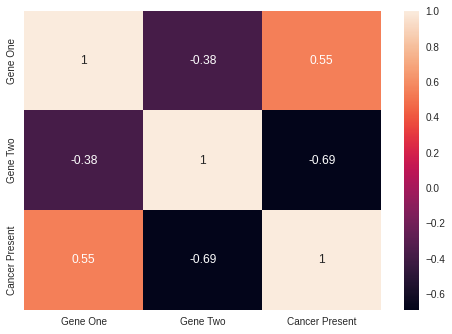

In [ ]:
# Checking for correlations between independent and dependent variable
sns.heatmap(df.corr(),annot=True)

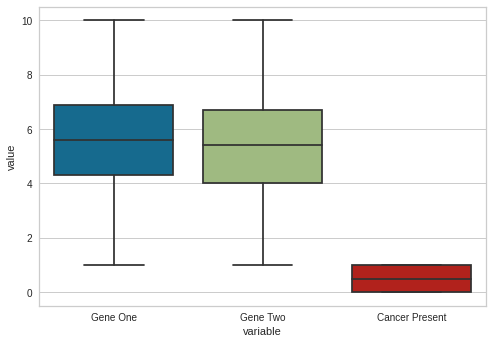

In [ ]:
# Checking for Outliers using BOXPLOT: No outlier found.
df_melted = pd.melt(df)
sns.boxplot(x='variable', y='value', data=df_melted)

In [ ]:
data_train = df.sample(frac=0.8, random_state= 23)

In [ ]:
data_train.shape

(2400, 3)

In [ ]:
data_train.head()

,Gene One,Gene Two,Cancer Present
2040,6.8,5.9,0
145,4.5,8.5,0
2202,8.0,3.1,1
1104,8.7,5.8,1
563,3.8,6.9,0


In [ ]:
data_test = df.drop(data_train.index)

In [ ]:
data_test.shape

(600, 3)

In [ ]:
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

In [ ]:
data_test.head()

,Gene One,Gene Two,Cancer Present
0,7.4,3.4,1
1,6.3,4.9,1
2,6.6,2.9,1
3,6.6,4.5,0
4,5.4,7.2,0


## Model Building

In [ ]:
clf = setup(data=data_train, target = "Cancer Present", session_id = 123)

,Description,Value
0,session_id,123
1,Target,Cancer Present
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2400, 3)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Cancer Present',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', '

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9345,0.9794,0.9337,0.9387,0.9359,0.8689,0.8694,0.117
knn,K Neighbors Classifier,0.9285,0.9660,0.9326,0.9286,0.9304,0.8569,0.8573,0.116
ada,Ada Boost Classifier,0.9285,0.9795,0.9198,0.9407,0.9293,0.8571,0.8587,0.112
lightgbm,Light Gradient Boosting Machine,0.9243,0.9745,0.9384,0.9168,0.9271,0.8485,0.8495,0.225
rf,Random Forest Classifier,0.9226,0.9720,0.9291,0.9216,0.9249,0.8450,0.8459,0.509
et,Extra Trees Classifier,0.9172,0.9483,0.9174,0.9213,0.9189,0.8343,0.8352,0.485
dt,Decision Tree Classifier,0.9065,0.9125,0.9023,0.9148,0.9081,0.8129,0.8139,0.016
lr,Logistic Regression,0.8529,0.9389,0.8535,0.8595,0.8560,0.7056,0.7065,0.555
nb,Naive Bayes,0.8517,0.9387,0.8488,0.8610,0.8544,0.7033,0.7043,0.015
qda,Quadratic Discriminant Analysis,0.8517,0.9388,0.8500,0.8602,0.8545,0.7033,0.7043,0.014


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## WITHOUT HYPERPARAMETER TUNING

In [ ]:
NO_HYPER_TUNE=create_model("gbc")  # CROSS VAL SCORE 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9345,0.9772,0.9419,0.9310,0.9364,0.8689,0.8690
1,0.9226,0.9811,0.9535,0.9011,0.9266,0.8449,0.8464
2,0.9405,0.9844,0.9651,0.9222,0.9432,0.8807,0.8818
3,0.9286,0.9816,0.9419,0.9205,0.9310,0.8570,0.8572
4,0.9405,0.9853,0.9419,0.9419,0.9419,0.8809,0.8809
5,0.9107,0.9840,0.8488,0.9733,0.9068,0.8219,0.8290
6,0.9345,0.9765,0.9070,0.9630,0.9341,0.8692,0.8707
7,0.9286,0.9798,0.8953,0.9625,0.9277,0.8573,0.8595
8,0.9226,0.9762,0.9186,0.9294,0.9240,0.8452,0.8453


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 10
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:create_model() succesfully completed......................................


## WITH HYPERPARAMETER TUNING

In [ ]:
HYPER_TUNE = tune_model(best_model) # Applying hyperparameter tuning with cross val score on the best model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9464,0.9851,0.9767,0.9231,0.9492,0.8926,0.8942
1,0.9405,0.9814,0.9419,0.9419,0.9419,0.8809,0.8809
2,0.9464,0.9871,0.9535,0.9425,0.9480,0.8928,0.8928
3,0.9167,0.9755,0.9302,0.9091,0.9195,0.8331,0.8334
4,0.9524,0.9885,0.9767,0.9333,0.9545,0.9046,0.9056
5,0.9345,0.9834,0.9070,0.9630,0.9341,0.8692,0.8707
6,0.9524,0.9768,0.9302,0.9756,0.9524,0.9048,0.9058
7,0.9286,0.9784,0.9302,0.9302,0.9302,0.8571,0.8571
8,0.9167,0.9754,0.9535,0.8913,0.9213,0.8330,0.8351


INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 11
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


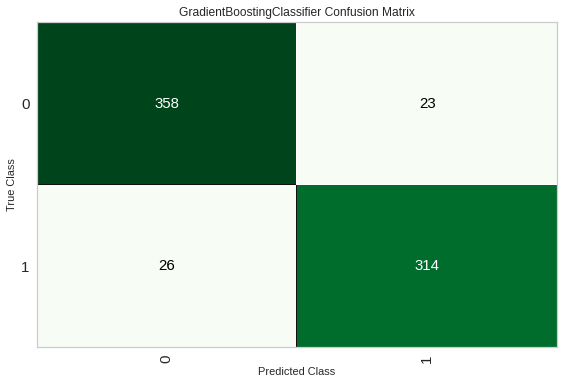

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(HYPER_TUNE, plot="confusion_matrix")

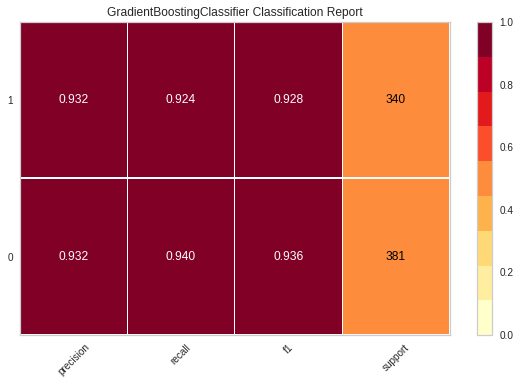

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(HYPER_TUNE, plot="class_report")

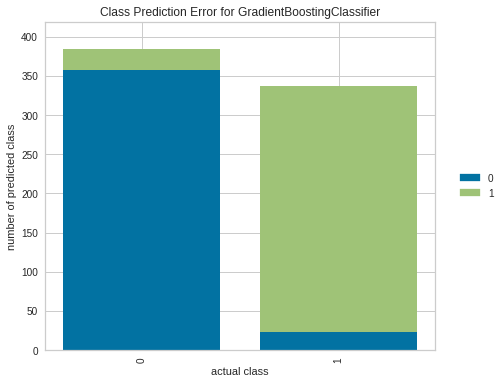

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(HYPER_TUNE, plot="error")

In [ ]:
evaluate_model(HYPER_TUNE)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
FINAL_MODEL=finalize_model(HYPER_TUNE)
print(FINAL_MODEL)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
       

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## TEST DATA (PREDICTION)

In [ ]:
TEST_PREDICTION=predict_model(FINAL_MODEL, data=data_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Prelo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.93,0.9747,0.93,0.93,0.93,0.86,0.86


In [ ]:
TEST_PREDICTION.head(20)

,Gene One,Gene Two,Cancer Present,Label,Score
0,7.4,3.4,1,1,0.8618
1,6.3,4.9,1,0,0.5418
2,6.6,2.9,1,1,0.8616
3,6.6,4.5,0,1,0.5206
4,5.4,7.2,0,0,0.8629
5,4.2,9.3,0,0,0.8677
6,6.6,3.7,0,1,0.8314
7,5.4,2.9,1,1,0.8694
8,2.5,4.8,0,0,0.8407
9,6.2,6.5,0,0,0.8443


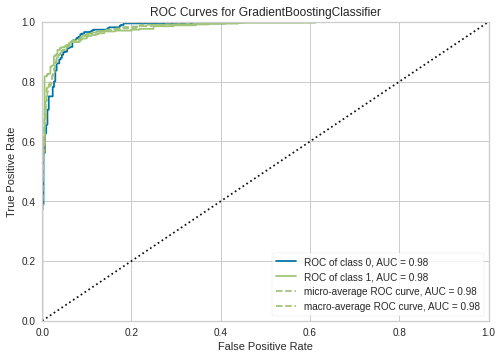

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = HYPER_TUNE, plot = 'auc')

In [ ]:
FINAL_MODEL.feature_importances_

array([0.45471106, 0.54528894])

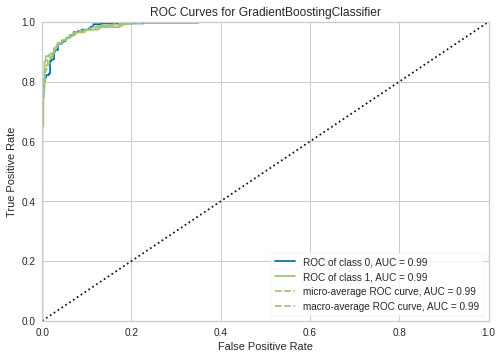

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(FINAL_MODEL, plot = 'auc') 

In [ ]:
comp_top3 = compare_models(n_select = 7) 

stack = stack_models(comp_top3) 

stack 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9464,0.9789,0.9651,0.9326,0.9486,0.8927,0.8933
1,0.9345,0.9784,0.9419,0.9310,0.9364,0.8689,0.8690
2,0.9345,0.9830,0.9419,0.9310,0.9364,0.8689,0.8690
3,0.9107,0.9699,0.9302,0.8989,0.9143,0.8212,0.8217
4,0.9524,0.9902,0.9651,0.9432,0.9540,0.9047,0.9049
5,0.9345,0.9806,0.9070,0.9630,0.9341,0.8692,0.8707
6,0.9405,0.9762,0.9186,0.9634,0.9405,0.8810,0.8820
7,0.9226,0.9780,0.9186,0.9294,0.9240,0.8452,0.8453
8,0.9226,0.9714,0.9535,0.9011,0.9266,0.8449,0.8464


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 9
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                      

StackingClassifier(cv=5,
                   estimators=[('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [ ]:
save_model(FINAL_MODEL, model_name='new_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), model_name=new_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
            

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Cancer Present',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                                             learning_rate=0.01, loss='deviance',
                                             max_depth=7, max_features='sqrt',
                                             max_leaf_nodes=None,
       

## FINAL MODEL Stats

In [ ]:
# HYPOTHESIS:
# H0 : Model is statistical significance 
# H1 : Model has NO statistical significance 